In [48]:
from pandas_datareader import data as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scs
import math
import scipy.optimize as sco

%matplotlib inline

In [3]:
symbols =  ['AAPL', 'GM', 'GE', 'FB', 'WMT']

data = pd.DataFrame()

for stock in symbols:
    data[stock] = web.DataReader(stock, data_source='yahoo',start='2015-1-1' ,end='2017-1-1')['Adj Close']
    

,AAPL,GM,GE,FB,WMT
Date,,,,,
2015-01-02,101.528191,28.820156,20.787260,78.449997,76.921585
2015-01-05,98.667984,28.398285,20.405699,77.190002,76.697708


In [5]:
noa = len(symbols)

In [6]:
data = data.dropna()

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 504 entries, 2015-01-02 to 2016-12-30
Data columns (total 5 columns):
AAPL    504 non-null float64
GM      504 non-null float64
GE      504 non-null float64
FB      504 non-null float64
WMT     504 non-null float64
dtypes: float64(5)
memory usage: 23.6 KB


In [8]:
data.head(2)

,AAPL,GM,GE,FB,WMT
Date,,,,,
2015-01-02,101.528191,28.820156,20.787260,78.449997,76.921585
2015-01-05,98.667984,28.398285,20.405699,77.190002,76.697708


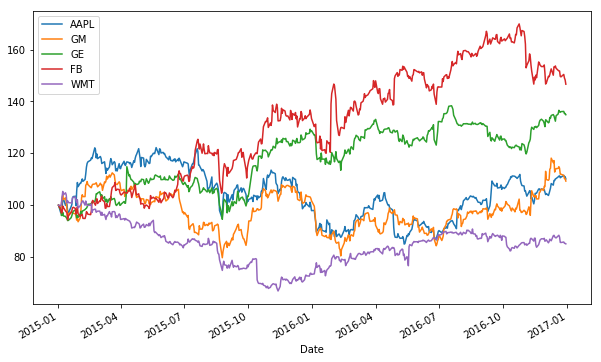

In [9]:
(data / data.iloc[0] * 100).plot(figsize=(10, 6))

In [22]:
rets = np.log(data / data.shift(1))

In [23]:
rets.head()

,AAPL,GM,GE,FB,WMT
Date,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.028576,-0.014746,-0.018526,-0.016191,-0.002915
2015-01-06,0.000094,0.015033,-0.021780,-0.013565,0.007676
2015-01-07,0.013925,0.028012,0.000416,0.000000,0.026186
2015-01-08,0.037703,0.009994,0.011971,0.026309,0.020887


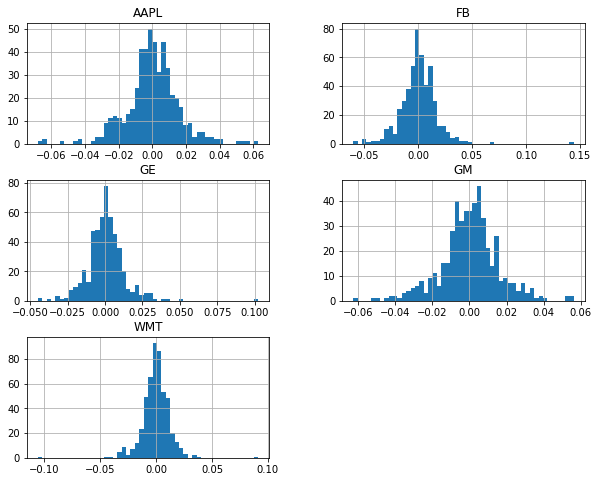

In [12]:
log_returns.hist(bins=50, figsize=(10, 8));

In [20]:
def print_statistics(array):
    ''' Prints selected statistics.
    Parameters
    ==========
    array: ndarray
    object to generate statistics on
    '''
    sta = scs.describe(array)
    print('%14s %15s' % ('statistic', 'value'))
    print(30 * '-')
    print('%14s %15.5f' % ('size', sta[0]))
    print('%14s %15.5f' % ('min', sta[1][0]))
    print('%14s %15.5f' % ('max', sta[1][1]))
    print('%14s %15.5f' % ('mean', sta[2]))
    print('%14s %15.5f' % ('std', np.sqrt(sta[3])))
    print('%14s %15.5f' % ('skew', sta[4]))
    print('%14s %15.5f' % ('kurtosis', sta[5]))

In [21]:
for sym in symbols:
    print('\nResults for symbol {}'.format(sym))
    print(30 * '-')
    log_data = np.array(log_returns[sym].dropna())
    print_statistics(log_data)


Results for symbol AAPL
------------------------------
     statistic           value
------------------------------
          size       503.00000
           min        -0.06796
           max         0.06294
          mean         0.00019
           std         0.01582
          skew        -0.18594
      kurtosis         2.51179

Results for symbol GM
------------------------------
     statistic           value
------------------------------
          size       503.00000
           min        -0.06274
           max         0.05633
          mean         0.00018
           std         0.01577
          skew        -0.09284
      kurtosis         1.62478

Results for symbol GE
------------------------------
     statistic           value
------------------------------
          size       503.00000
           min        -0.04492
           max         0.10260
          mean         0.00059
           std         0.01241
          skew         1.16928
      kurtosis         9.93100

## Portfolio Optimization

In [24]:
rets.mean() * 252

AAPL    0.048379
GM      0.044583
GE      0.149928
FB      0.191833
WMT    -0.080805
dtype: float64

In [25]:
rets.cov() * 252

,AAPL,GM,GE,FB,WMT
AAPL,0.063064,0.022841,0.019310,0.030693,0.012703
GM,0.022841,0.062700,0.024303,0.020359,0.012173
GE,0.019310,0.024303,0.038805,0.019858,0.012770
FB,0.030693,0.020359,0.019858,0.071706,0.010804
WMT,0.012703,0.012173,0.012770,0.010804,0.040410


In [26]:
weights = np.random.random(noa)

In [27]:
weights /= np.sum(weights)

In [28]:
weights

array([0.01669609, 0.26379764, 0.19410198, 0.2631163 , 0.26228799])

In [29]:
weights.sum()

1.0

In [30]:
np.sum(rets.mean() * weights) * 252

0.07095041730986448

Annualized portfolio variance given the portfolio weights

In [31]:
np.dot(weights.T, np.dot(rets.cov() * 252, weights))

0.02611359994154877

Annualized portfolio volatility given the portfolio weights.

In [34]:
math.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))

0.16159702949481705

This mainly completes the tool set for mean-variance portfolio selection. Of
paramount interest to investors is what risk-return profiles are possible for a
given set of financial instruments, and their statistical characteristics. To this
end, the following implements a Monte Carlo simulation (see Chapter 12) to
generate random portfolio weight vectors on a larger scale. For every simulated
allocation, the code records the resulting expected portfolio return and variance.
To simplify the code, two functions, port_ret() and port_vol(), are defined:

In [36]:
def port_ret(weights):
    return np.sum(rets.mean() * weights) * 252

In [37]:
def port_vol(weights):
    return np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))

In [38]:
prets = []
pvols = []
for p in range (2500):
        weights = np.random.random(noa)
        weights /= np.sum(weights)
        prets.append(port_ret(weights))
        pvols.append(port_vol(weights))
prets = np.array(prets)
pvols = np.array(pvols)

Expected return and volatility for random portfolio weights

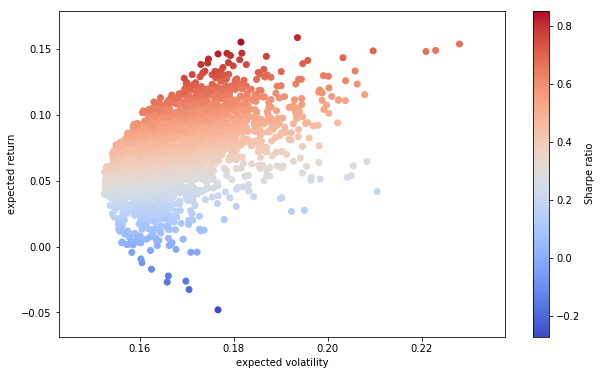

In [40]:
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=prets / pvols,
marker='o', cmap='coolwarm')
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio');

This minimization function is quite general and allows for equality constraints,
inequality constraints, and numerical bounds for the parameters.

First, the maximization of the Sharpe ratio.

In [41]:
def min_func_sharpe(weights):
    return -port_ret(weights) / port_vol(weights)

In [42]:
cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

In [43]:
bnds = tuple((0, 1) for x in range(noa))

In [44]:
eweights = np.array(noa * [1. / noa,])

In [45]:
eweights

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [46]:
min_func_sharpe(eweights)

-0.4395545660775274

In [49]:
%%time
opts = sco.minimize(min_func_sharpe, eweights,
method='SLSQP', bounds=bnds,
constraints=cons)

Wall time: 71.4 ms


In [50]:
opts

     fun: -0.8913846474068722
     jac: array([ 3.49140219e-01,  3.43676537e-01, -1.04457140e-05,  1.62646174e-05,
        7.40212321e-01])
 message: 'Optimization terminated successfully.'
    nfev: 42
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([0.00000000e+00, 1.19911259e-16, 6.08435653e-01, 3.91564347e-01,
       0.00000000e+00])

In [51]:
opts['x'].round(3)

array([0.   , 0.   , 0.608, 0.392, 0.   ])

In [52]:
port_ret(opts['x']).round(3)

0.166

In [53]:
port_vol(opts['x']).round(3)

0.187

In [54]:
port_ret(opts['x']) / port_vol(opts['x'])

0.8913846474068722

In [55]:
optv = sco.minimize(port_vol, eweights,
method='SLSQP', bounds=bnds,
constraints=cons)

In [56]:
optv

     fun: 0.15205398022706404
     jac: array([0.15180317, 0.15171863, 0.15189159, 0.15203051, 0.15234552])
 message: 'Optimization terminated successfully.'
    nfev: 63
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([0.1083198 , 0.10495444, 0.29387804, 0.10664723, 0.38620049])

In [57]:
optv['x'].round(3)

array([0.108, 0.105, 0.294, 0.107, 0.386])

#### Efficient Frontier

##### constraints

In [58]:
cons = ({'type': 'eq', 'fun': lambda x: port_ret(x) - tret},
{'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

In [59]:
bnds = tuple((0, 1) for x in weights)

In [60]:
%%time
trets = np.linspace(0.05, 0.2, 50)
tvols = []
for tret in trets:
    res = sco.minimize(port_vol, eweights, method='SLSQP',
                        bounds=bnds, constraints=cons)
    tvols.append(res['fun'])

Wall time: 2.92 s


In [61]:
tvols = np.array(tvols)

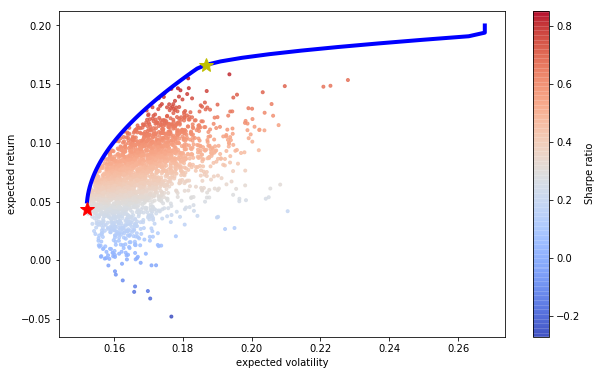

In [62]:
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=prets / pvols,
marker='.', alpha=0.8, cmap='coolwarm')
plt.plot(tvols, trets, 'b', lw=4.0)
plt.plot(port_vol(opts['x']), port_ret(opts['x']),
'y*', markersize=15.0)
plt.plot(port_vol(optv['x']), port_ret(optv['x']),
'r*', markersize=15.0)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')